# Install and Import Required Libraries
Install the necessary libraries, including memorytools, and then import them.

In [1]:
%%capture captured_output
!pip install .
!pip install ipympl

In [2]:
# Import the necessary libraries
from memorytools.memorymonitor import MemoryMonitor
import matplotlib.pyplot as plt


## Process used to analyse


### Load Data from File
Use memorytools to load data from the '/home/bpc/Documents/memorytools/data/tdcstst_continuous_monitoring.dat' file.

In [ ]:
# Load the data from the file
tdcs_cont = MemoryMonitor()
tdcs_cont.import_from_csv("data/tdcstst_continuous.csv")

### Find which tdcstst processes are showing as leaking


In [ ]:
abnorm_pid, abnorm_names = tdcs_cont.detect_leaks("LBR")

# Continuous monitoing of tdcstst

## Findings before adding resampling

In [ ]:
abnorm_pids1 = set(
    [
        561924,
        539529,
        547216,
        539539,
        547353,
        547354,
        539549,
        539559,
        539569,
        539579,
        539459,
        539469,
        539479,
        539489,
        539499,
        539509,
        563064,
        563066,
        539519,
    ]
)

In [ ]:
# for pid in abnorm_pids2:
#     tdcs_cont.plot_data_to_screen([pid])
    # tdcs_cont.plot_data_to_file(proc_pads=[pid], filename=f"/home/bpc/Documents/memorytools/data/tdcstst_Continuous_ParamA_{pid}.png")

Files saved to file are
### Images in data/ParamSetA

Here are the images in the `data/ParamSetA` directory:

![Image](data/ParamSetA/tdcstst_Continuous_ParamA_539459.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_539469.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_539479.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_539489.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_539499.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_539509.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_539519.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_539529.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_539539.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_539549.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_539559.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_539569.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_539579.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_547216.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_547353.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_547354.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_561924.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_563064.png)
![Image](data/ParamSetA/tdcstst_Continuous_ParamA_563066.png)


The above would indicate that we have some abnormalities being reported just from points where there is a fairly big jump, e.g. from turning a control process ON or OFF. This is a problem as it is highlightying things that we see a lot in our CI code. 

Tuning the parameters more I think will fix this

The above uses the following
```
WINDOW_MIN = 4 # Add in some form of smoothing
R_SQR_MIN = 0.8 #From paper
CRITICAL_TIME_MAX = 60*60*1 # 1 hours
CRITICAL_MEMORY_USAGE = ps.virtual_memory().total

CPD_THRESHOLD = 3 # 3 times the standard deviation, from paper
```


The main thing we want to do is this, adjust the WINDOW_MIN to be increased and also add smoothing that will remove these jumps 

## After addition of reasampling, changed parameters

In [ ]:
# Load the data from the file
tdcs_cont = MemoryMonitor()
tdcs_cont.import_from_csv("/home/bpc/Documents/memorytools/data/tdcstst_continuous.csv")

In [ ]:
abnorm_pid, abnorm_names = tdcs_cont.detect_leaks("LBR")

# TDCSArv @1s intervals - testing known leaking data sets

Parameters used
WIN_MIN_NUM_POINTS_DETECT =  60 # points = 10 seconds
WIN_MIN_NUM_POINTS_RESAMPLE = 10 #Number of points required to do a resample/any further analysis 
RESAMPLE_MIN_WIN = timedelta(seconds=0.5).total_seconds() # 100ms
R_SQR_MIN = 0.9 #From paper
CRITICAL_TIME_MAX = 60*60*1 # 1 hours
CRITICAL_MEMORY_USAGE = ps.virtual_memory().total

In [ ]:
from memorytools import memoryanalysis
from datetime import timedelta
import psutil as ps

memoryanalysis.WIN_MIN_NUM_POINTS_DETECT =  60 # points = 10 seconds
memoryanalysis.WIN_MIN_NUM_POINTS_RESAMPLE = 10 #Number of points required to do a resample/any further analysis 
memoryanalysis.RESAMPLE_MIN_WIN = timedelta(seconds=0.5).total_seconds() # 100ms
memoryanalysis.R_SQR_MIN = 0.9 #From paper
memoryanalysis.CRITICAL_TIME_MAX = 60*60*1 # 1 hours
memoryanalysis.CRITICAL_MEMORY_USAGE = ps.virtual_memory().total

## Revision -377028 - Leaking 
Description of error

In [ ]:
plt.cla()
tdcsarv_377208 = MemoryMonitor()
tdcsarv_377208.import_from_csv("data/TDCSARV testing/1s granularity/TDCSARV_CONTINOUS TESTING/csv files/tdcsarv_377208.csv")

abnorm_pid, abnorm_names = tdcsarv_377208.detect_leaks("LBR")

In [ ]:
plt.cla()
tdcsarv_377208.plot_data_to_screen([400924])

## Revision - 382396 - Leaking 
Description of error

In [ ]:
plt.cla()
tdcsarv_382396 = MemoryMonitor()
tdcsarv_382396.import_from_csv("data/TDCSARV testing/1s granularity/TDCSARV_CONTINOUS TESTING/csv files/tdcsarv_382396.csv")

abnorm_pid, abnorm_names = tdcsarv_382396.detect_leaks("LBR")

In [ ]:
%matplotlib widget
plt.cla()
tdcsarv_382396.plot_data_to_screen([419565,421932,421707,421945,421958])
# html_str = mpld3.fig_to_html(tdcsarv_382396.plot_data_to_screen([419565]))
# Html_file= open("index.html","w")
# Html_file.write(html_str)
# Html_file.close()


## Revision -387927 - Not leaking 
No leak trunk version

In [ ]:
tdcsarv_387927 = MemoryMonitor()
tdcsarv_387927.import_from_csv("data/TDCSARV testing/1s granularity/TDCSARV_CONTINOUS TESTING/csv files/tdcsarv_387927.csv")

abnorm_pid, abnorm_names = tdcsarv_387927.detect_leaks("LBR")

In [ ]:
plt.cla()
tdcsarv_387927.plot_data_to_screen(names=["tdcsarvControl"])


# TDCSARV @0.0001

In [ ]:
#Known working params
# memoryanalysis.WIN_MIN_NUM_POINTS_DETECT =  10 # points = 5 seconds
# memoryanalysis.WIN_MIN_NUM_POINTS_RESAMPLE = 10 #Number of points required to do a resample/any further analysis 
# memoryanalysis.RESAMPLE_MIN_WIN = timedelta(seconds=0.5).total_seconds() # 0.5ms
# memoryanalysis.R_SQR_MIN = 0.9 #From paper
# memoryanalysis.CRITICAL_TIME_MAX = 60*60*1 # 1 hours
# memoryanalysis.CRITICAL_MEMORY_USAGE = ps.virtual_memory().total
# memoryanalysis.MAX_TIME_DIFF = 0.5

In [9]:
#Parameters
from memorytools import memoryanalysis
from datetime import timedelta
import psutil as ps
memoryanalysis.WIN_MIN_NUM_POINTS_DETECT =  int(200) # points = 1s
memoryanalysis.WIN_MIN_NUM_POINTS_RESAMPLE = 10 #Number of points required to do a resample/any further analysis 
memoryanalysis.RESAMPLE_MIN_WIN = timedelta(seconds=0.005).total_seconds() # 5ms

memoryanalysis.R_SQR_MIN = 0.9 #From paper
memoryanalysis.CRITICAL_TIME_MAX = 60*60*1 # 1 hours
memoryanalysis.CRITICAL_MEMORY_USAGE = ps.virtual_memory().total
memoryanalysis.MAX_TIME_DIFF = 0.5

## Revision -377028 - Leaking 
Description of error

NO MEMORY DATA FILE FOUND
ccsNextPhase-596828: Insufficient data for process ccsNextPhase with pid 596828
ccsNextPhase-596828: Unable to resample 1/1


0.9001621865641183


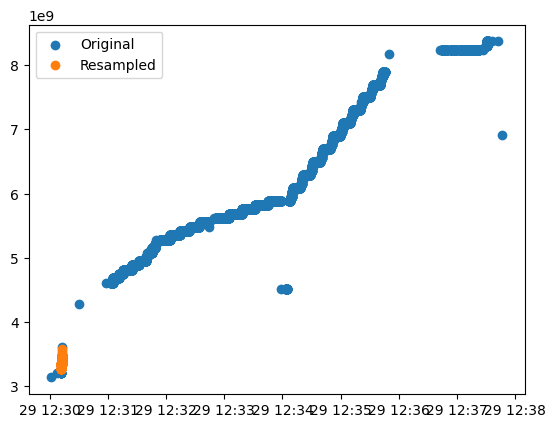

0.9000146151250605


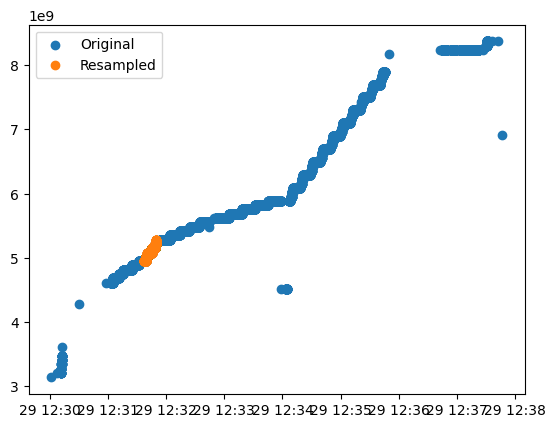

0.9000145956146607


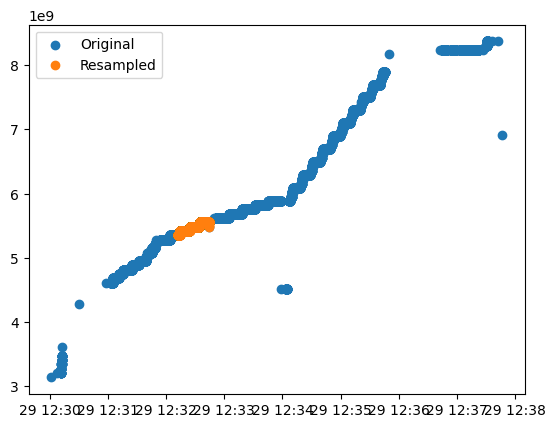

0.9000007829091329


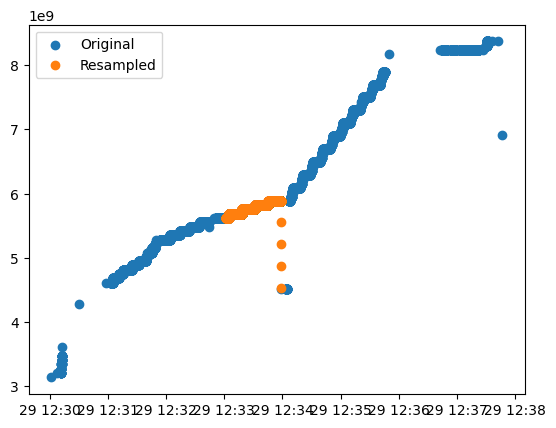

0.9001917403691906


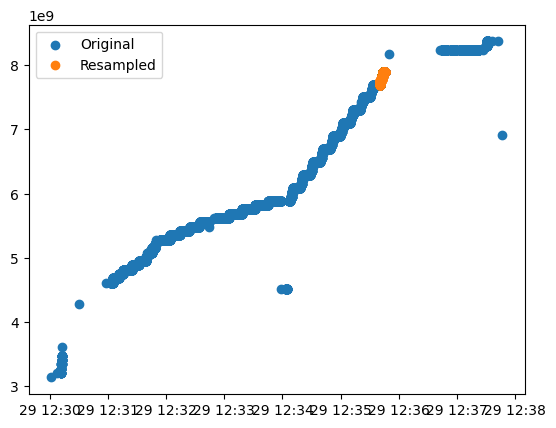

tdcsimControl-599572: Insufficient data for process tdcsimControl with pid 599572
tdcsimControl-599572: Unable to resample 2/2
tdcsarvControl-599573: Insufficient data for process tdcsarvControl with pid 599573
tdcsarvControl-599573: Unable to resample 2/2
tdcsarvTestErrCt-599581: Insufficient data for process tdcsarvTestErrCt with pid 599581
tdcsarvTestErrCt-599581: Unable to resample 1/1
tdcsimControl-599997: Insufficient data for process tdcsimControl with pid 599997
tdcsimControl-599997: Unable to resample 1/1
tdcsimControl-600007: Insufficient data for process tdcsimControl with pid 600007
tdcsimControl-600007: Unable to resample 1/1
Unable to process 6/24
Abnormal memory usage detected in process: tdcsarvControlwith pid 596953


In [10]:
# %matplotlib widget
plt.cla()
tdcsarv_377208 = MemoryMonitor()
tdcsarv_377208.import_from_csv("data/TDCSARV testing/0.001s granularity/csv files/tdcsarv_377208.csv")

abnorm_pid, abnorm_names = tdcsarv_377208.detect_leaks("LBR")

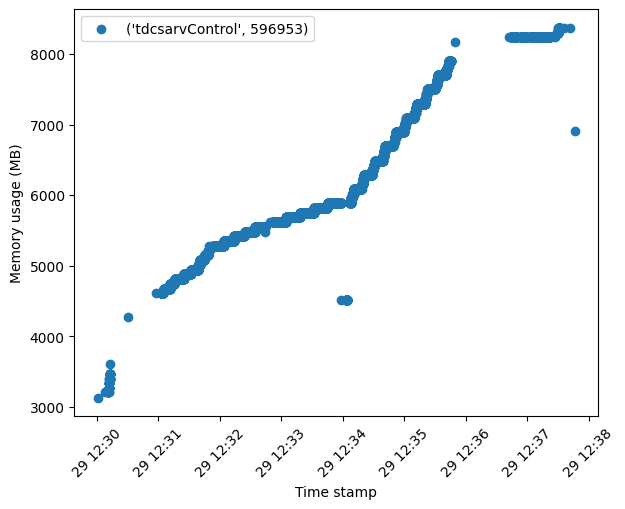

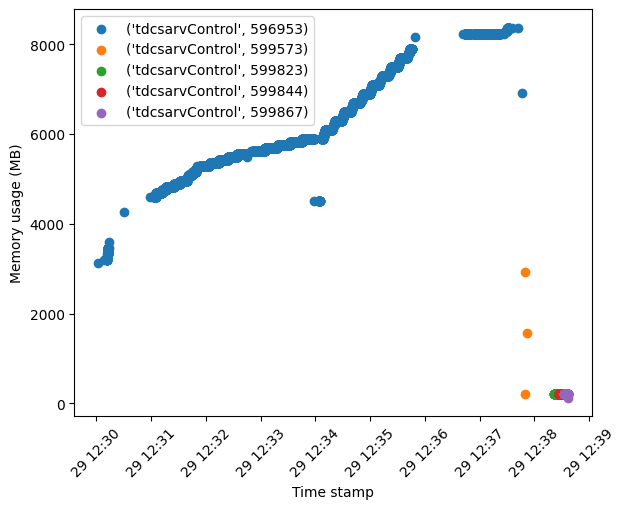

<module 'matplotlib.pyplot' from '/home/bpc/Documents/memorytools/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [11]:
plt.cla()
tdcsarv_377208.plot_data_to_screen([596953])
tdcsarv_377208.plot_data_to_screen(names=["tdcsarvControl"])

## Revision - 382396 - Leaking 
Description of error

NameError: name 'tdcsarv_382396' is not defined

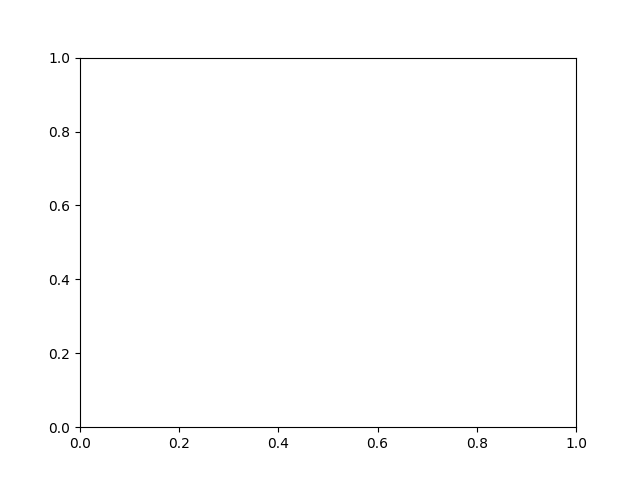

In [12]:
%matplotlib widget
plt.cla()
tdcsarv_382396.plot_data_to_screen([619535])
tdcsarv_382396.plot_data_to_screen(names=["tdcsarvControl"])

## Revision -387927 - Not leaking 
No leak trunk version

In [13]:
tdcsarv_387927 = MemoryMonitor()
tdcsarv_387927.import_from_csv("data/TDCSARV testing/0.001s granularity/csv files/tdcsarv_387927.csv")

abnorm_pid, abnorm_names = tdcsarv_387927.detect_leaks("LBR")

NO MEMORY DATA FILE FOUND
ccsNextPhase-636582: Insufficient data for process ccsNextPhase with pid 636582
ccsNextPhase-636582: Unable to resample 2/2
tdcsimControl-639695: Insufficient data for process tdcsimControl with pid 639695
tdcsimControl-639695: Unable to resample 3/3
tdcsarvControl-639696: Insufficient data for process tdcsarvControl with pid 639696
tdcsarvControl-639696: Unable to resample 3/3
tdcsarvTestErrCt-639704: Insufficient data for process tdcsarvTestErrCt with pid 639704
tdcsarvTestErrCt-639704: Unable to resample 2/2
tdcsarvTestErrC-639914: Insufficient data for process tdcsarvTestErrC with pid 639914
tdcsarvTestErrC-639914: Unable to resample 1/1
tdcsimControl-640054: Insufficient data for process tdcsimControl with pid 640054
tdcsimControl-640054: Unable to resample 2/2
tdcsarvControl-640055: Insufficient data for process tdcsarvControl with pid 640055
tdcsarvControl-640055: Unable to resample 1/1
tdcsimControl-640239: Insufficient data for process tdcsimControl w

In [ ]:
plt.cla()
tdcsarv_387927.plot_data_to_screen(names=["tdcsarvControl"])

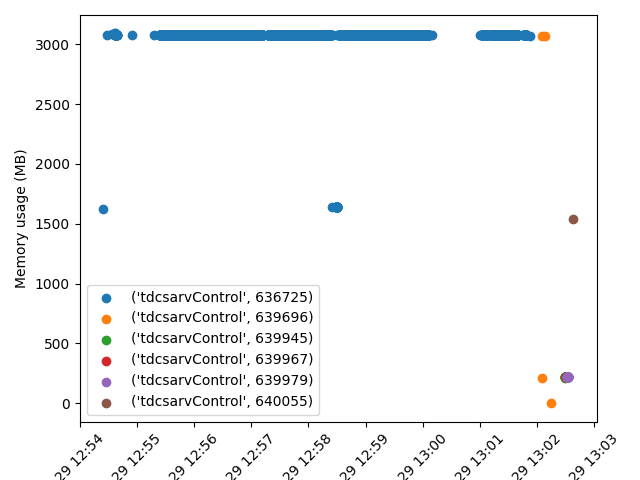

<module 'matplotlib.pyplot' from '/home/bpc/Documents/memorytools/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [14]:
plt.cla()
tdcsarv_387927.plot_data_to_screen(names=["tdcsarvControl"])

# TDCSARV @0.5s

In [ ]:
#Parameters

from memorytools import memoryanalysis
from datetime import timedelta
import psutil as ps
memoryanalysis.WIN_MIN_NUM_POINTS_DETECT = 100 # points = 10 seconds
memoryanalysis.WIN_MIN_NUM_POINTS_RESAMPLE = 10 #Number of points required to do a resample/any further analysis 10s
memoryanalysis.RESAMPLE_MIN_WIN = timedelta(seconds=0.05).total_seconds() # 0.5ms
memoryanalysis.R_SQR_MIN = 0.9 #From paper
memoryanalysis.CRITICAL_TIME_MAX = 60*60*1 # 1 hours
memoryanalysis.CRITICAL_MEMORY_USAGE = ps.virtual_memory().total

## Revision -377028 - Leaking 
Description of error

In [ ]:
# %matplotlib widget
plt.cla()
tdcsarv_377208 = MemoryMonitor()
tdcsarv_377208.import_from_csv("data/TDCSARV testing/dt0.5s/csv files/tdcsarv_377208.csv")



In [ ]:
%matplotlib widget
abnorm_pid, abnorm_names = tdcsarv_377208.detect_leaks("LBR")

In [ ]:
# %matplotlib widget
# plt.cla()
# tdcsarv_377208.plot_data_to_screen([596953])

## Revision - 382396 - Leaking 
Description of error

In [ ]:
%matplotlib inline
plt.cla()
tdcsarv_382396 = MemoryMonitor()
tdcsarv_382396.import_from_csv("data/TDCSARV testing/dt0.5s/csv files/tdcsarv_382396.csv")

In [ ]:
abnorm_pid, abnorm_names = tdcsarv_382396.detect_leaks("LBR")

## Revision -387927 - Not leaking 
No leak trunk version

In [ ]:
plt.cla()
tdcsarv_387927 = MemoryMonitor()
tdcsarv_387927.import_from_csv("data/TDCSARV testing/dt0.5s/csv files/tdcsarv_387927.csv")

abnorm_pid, abnorm_names = tdcsarv_387927.detect_leaks("LBR")

In [ ]:
# plt.cla()
# tdcsarv_387927.plot_data_to_screen(names=["tdcsarvControl"])
